In [5]:
import numpy as np
import keras 
from keras.utils import to_categorical
import pandas as pd
import os 
import shutil
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
#from keras.preprocessing import Image

Using TensorFlow backend.


In [2]:
File_path= "Chestdataset//metadata.csv"
Images_path = "Chestdataset//images"


In [3]:
df= pd.read_csv(File_path)
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [21]:
Tgt = "Dataset"
if not os.path.exists(Tgt):
    os.mkdir(Tgt)
Target= "Dataset//Covid"
if not os.path.exists(Target):
    os.mkdir(Target)
    
    

    

In [25]:
cnt=0
for i,row in df.iterrows():
    if row["finding"] == 'COVID-19' and row["view"]=="PA":
        cnt +=1
        filename= row["filename"]
        image_path= os.path.join(Images_path,filename)
        target_path= os.path.join(Target,filename)
        shutil.copy2(image_path,target_path)
        
       
        
        

In [36]:
import random
image_names= os.listdir(Target_normal)
random.shuffle(image_names)


In [37]:
TARGET_N = "Dataset//Normal"
if not os.path.exists(TARGET_N):
    os.mkdir(TARGET_N)
Target_normal= "Chestdataset//chest_xray//train//NORMAL"
cnt=0
for i in range(141):
    image_path= os.path.join(Target_normal,image_names[i])
    target_path= os.path.join(TARGET_N,image_names[i])
    shutil.copy2(image_path,target_path)
    
    


CREATING CNN MODEL

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation ='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])          
model.summary()         



 



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
__________________________

In [26]:
train_datagen= image.ImageDataGenerator(
          rescale=1./255,
           shear_range=0.2,
           zoom_range=0.2,
           horizontal_flip=True
)
test_dataset=image.ImageDataGenerator(
          rescale=1./255)
val_dataset=image.ImageDataGenerator(
          rescale=1./255)

In [182]:
train_generator = train_datagen.flow_from_directory(
    "Dataset",
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'binary'
    
)

train_generator.class_indices

Found 268 images belonging to 2 classes.


{'Covid': 0, 'Normal': 1}

In [31]:
validation_generator= val_dataset.flow_from_directory(
             "Valdataset",
              target_size= (224,224),
              batch_size= 28,
              class_mode= 'binary'
)
validation_generator.class_indices

Found 28 images belonging to 2 classes.


{'Covid': 0, 'Normal': 1}

In [33]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [35]:
checkpoint= ModelCheckpoint("best_model_covid-19.h5",monitor='val_loss',verbose=0,save_best_only=True)
earlystopping= EarlyStopping(monitor='val_loss', patience=2)

In [39]:
hist= model.fit_generator(train_generator,steps_per_epoch=8,
                         epochs=10,
                         validation_data=validation_generator,
                         validation_steps=2,
                         callbacks=[checkpoint,earlystopping])


Epoch 1/10
8/8 [==============================] - 94s 12s/step - loss: 1.9015 - accuracy: 0.5127 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 87s 11s/step - loss: 0.6762 - accuracy: 0.5127 - val_loss: 0.6774 - val_accuracy: 0.7857
Epoch 3/10
8/8 [==============================] - 86s 11s/step - loss: 0.6216 - accuracy: 0.7246 - val_loss: 0.5535 - val_accuracy: 0.9286
Epoch 4/10
8/8 [==============================] - 87s 11s/step - loss: 0.4074 - accuracy: 0.8263 - val_loss: 0.1493 - val_accuracy: 0.9643
Epoch 5/10
8/8 [==============================] - 93s 12s/step - loss: 0.3365 - accuracy: 0.9023 - val_loss: 0.1243 - val_accuracy: 0.9643
Epoch 6/10
8/8 [==============================] - 86s 11s/step - loss: 0.2476 - accuracy: 0.9153 - val_loss: 0.1337 - val_accuracy: 0.9643
Epoch 7/10
8/8 [==============================] - 86s 11s/step - loss: 0.1523 - accuracy: 0.9492 - val_loss: 0.0861 - val_accuracy: 0.9643
Epoch 8/10
8/8 [==========

In [79]:
h=hist.history
h

{'val_loss': [0.6886821389198303,
  0.6774247884750366,
  0.5535138845443726,
  0.14931882917881012,
  0.12432368099689484,
  0.13371720910072327,
  0.08607139438390732,
  0.10590864717960358,
  0.09323227405548096],
 'val_accuracy': [0.5,
  0.7857142686843872,
  0.9285714030265808,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128],
 'loss': [1.9940011258852683,
  0.6773322840868417,
  0.6174612014980639,
  0.4069777227054208,
  0.33654390554875135,
  0.2482506988917367,
  0.15794793276463526,
  0.18129294283561787,
  0.1358152382959754],
 'accuracy': [0.5127119,
  0.5127119,
  0.7245763,
  0.8262712,
  0.90234375,
  0.91525424,
  0.9491525,
  0.9364407,
  0.9661017]}

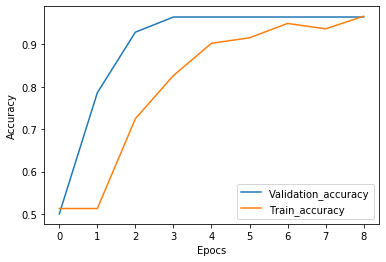

In [89]:
import matplotlib.pyplot as plt
plt.plot(h['val_accuracy'],label="Validation_accuracy")
plt.plot(h['accuracy'],label = "Train_accuracy")
plt.legend()
plt.xlabel("Epocs")
plt.ylabel("Accuracy")
plt.show()


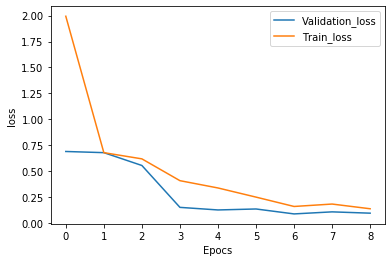

In [174]:
plt.plot(h['val_loss'],label="Validation_loss")
plt.plot(h['loss'],label = "Train_loss")
plt.legend()
plt.xlabel("Epocs")
plt.ylabel("loss")
plt.show()

In [88]:
plt.plot?

In [6]:
model=keras.models.load_model("best_model_covid-19.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [7]:
import cv2

In [41]:
imagetesting1= cv2.imread("cov3.jpg")
imagetesting =  cv2.cvtColor(imagetesting1,cv2.COLOR_BGR2RGB)
imagetesting = cv2.resize(imagetesting,(224,224))
imagetesting = imagetesting/255.0


In [42]:
imagetesting.shape

(224, 224, 3)

In [43]:
imagetesting = imagetesting.reshape(1,224,224,3)

In [46]:
imagetesting.shape
val=model.predict(imagetesting)[0][0]
if val >= 0.5 :
    print("negative")
else:
    print("positive")  

positive


0.010244211

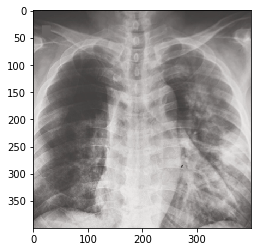

In [44]:
import matplotlib.pyplot as plt
plt.imshow(imagetesting1)

In [14]:
model.predict(imagetesting)

array([[0.00885859]], dtype=float32)